In [13]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


In [2]:
def load_history(path):
    with open(path, "rb") as f:
        return pickle.load(f)

In [ ]:
hist_cnn_baseline = load_history("training_history/history_cnn_shallow_w_callback.pkl")
hist_cnn_tuned = load_history("training_history/history_cnn_og.pkl")
hist_cnn_aug = load_history("training_history/history_cnn_augmentation2.pkl")
hist_resnet = load_history("training_history/history_cnn_resnet.pkl")
hist_transfer_cnn = load_history("training_history/history_transfer_cnn.pkl")
hist_vit = load_history("training_history/history_small_ViT.pkl")


In [42]:
hist_cnn_baseline = load_history("training_history/history_cnn_shallow_w_callback.pkl")

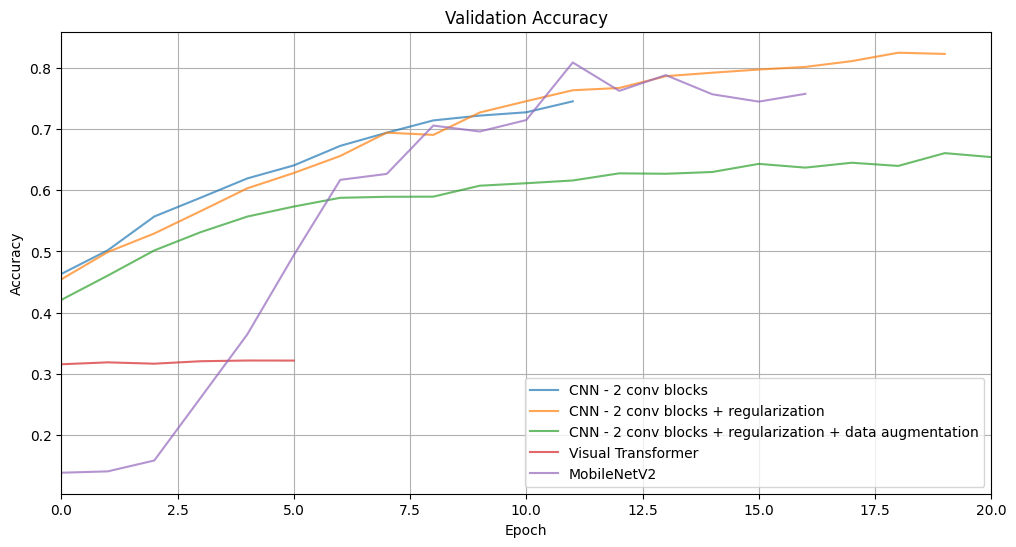

In [20]:
plt.figure(figsize=(12,6))

plt.plot(hist_cnn_baseline['val_accuracy'], label="CNN - 2 conv blocks", alpha=0.7)
plt.plot(hist_cnn_tuned['val_accuracy'], label="CNN - 2 conv blocks + regularization", alpha=0.7)
plt.plot(hist_cnn_aug['val_accuracy'], label="CNN - 2 conv blocks + regularization + data augmentation", alpha=0.7)
plt.plot(hist_vit['val_accuracy'], label="Visual Transformer", alpha=0.7)
plt.plot(hist_transfer_cnn['val_accuracy'], label="MobileNetV2", alpha=0.7)

plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xlim(0, 20)


plt.legend()
plt.grid(True)
plt.show()


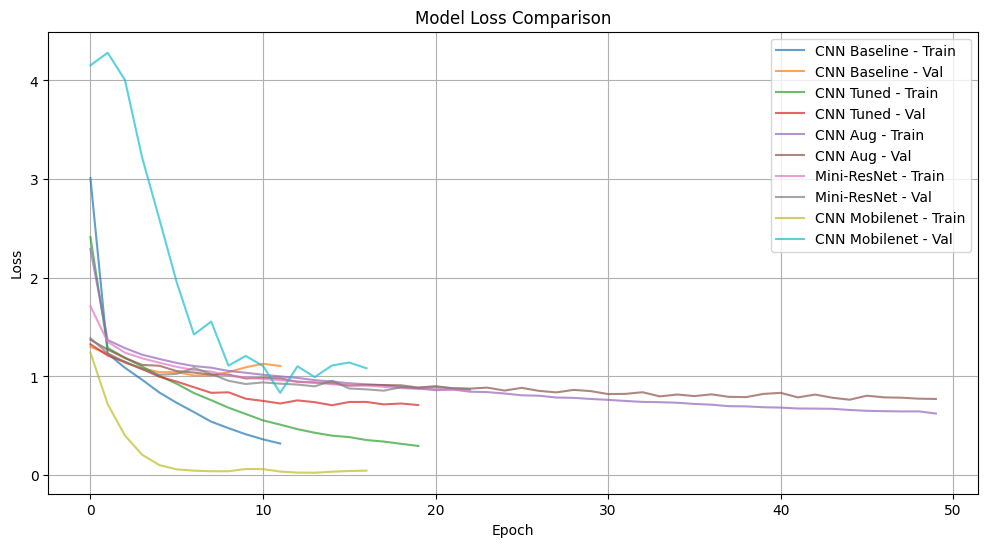

In [7]:
plt.figure(figsize=(12,6))

plt.plot(hist_cnn_baseline['loss'], label="CNN Baseline - Train", alpha=0.7)
plt.plot(hist_cnn_baseline['val_loss'], label="CNN Baseline - Val", alpha=0.7)

plt.plot(hist_cnn_tuned['loss'], label="CNN Tuned - Train", alpha=0.7)
plt.plot(hist_cnn_tuned['val_loss'], label="CNN Tuned - Val", alpha=0.7)

plt.plot(hist_cnn_aug['loss'], label="CNN Aug - Train", alpha=0.7)
plt.plot(hist_cnn_aug['val_loss'], label="CNN Aug - Val", alpha=0.7)

plt.plot(hist_resnet['loss'], label="Mini-ResNet - Train", alpha=0.7)
plt.plot(hist_resnet['val_loss'], label="Mini-ResNet - Val", alpha=0.7)

plt.plot(hist_transfer_cnn['loss'], label="CNN Mobilenet - Train", alpha=0.7)
plt.plot(hist_transfer_cnn['val_loss'], label="CNN Mobilenet - Val", alpha=0.7)

plt.title("Model Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
def best_metrics(hist):
    return {
        "Best Val Accuracy": max(hist["val_accuracy"]),
        "Best Val Loss": min(hist["val_loss"])
    }

df = pd.DataFrame({
    "CNN Baseline": best_metrics(hist_cnn_baseline),
    "CNN Tuned": best_metrics(hist_cnn_tuned),
    "CNN + Aug": best_metrics(hist_cnn_aug),
    "Mini-ResNet": best_metrics(hist_resnet),
    "MobileNet": best_metrics(hist_transfer_cnn),
    "ViT": best_metrics(hist_vit)
    
}).T

print(df)


              Best Val Accuracy  Best Val Loss
CNN Baseline           0.745238       1.010777
CNN Tuned              0.824657       0.708539
CNN + Aug              0.729309       0.764629
Mini-ResNet            0.657278       0.856322
MobileNet              0.808727       0.834004
ViT                    0.321828       1.538444


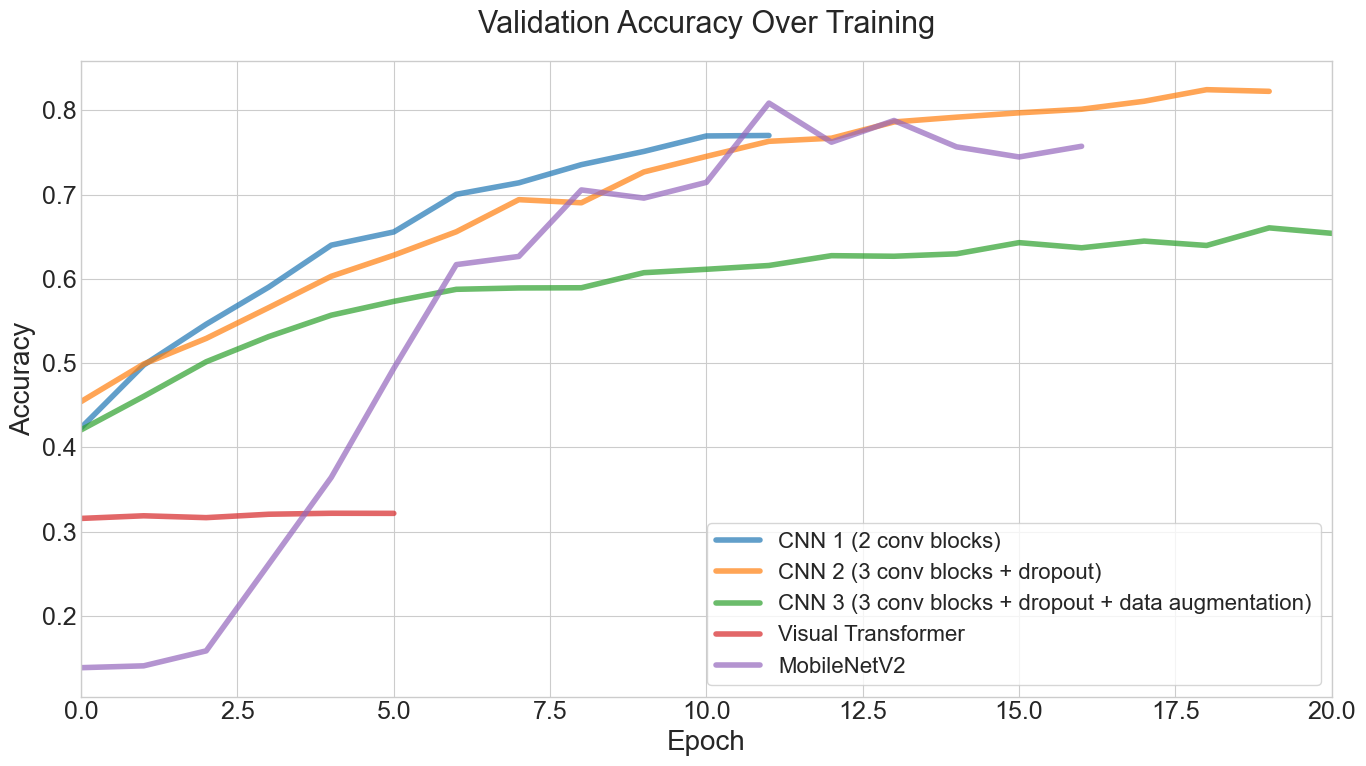

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

plt.figure(figsize=(14,8))

plt.rcParams['font.size'] = 18
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 16

colors = sns.color_palette("tab10", 5)

plt.plot(hist_cnn_baseline['val_accuracy'], label="CNN 1 (2 conv blocks)", linewidth=4, color=colors[0], alpha=0.7)
plt.plot(hist_cnn_tuned['val_accuracy'], label="CNN 2 (3 conv blocks + dropout)", linewidth=4, color=colors[1], alpha=0.7)
plt.plot(hist_cnn_aug['val_accuracy'], label="CNN 3 (3 conv blocks + dropout + data augmentation)", linewidth=4, color=colors[2], alpha=0.7)
plt.plot(hist_vit['val_accuracy'], label="Visual Transformer", linewidth=4, color=colors[3], alpha=0.7)
plt.plot(hist_transfer_cnn['val_accuracy'], label="MobileNetV2", linewidth=4, color=colors[4], alpha=0.7)

plt.title("Validation Accuracy Over Training", pad=20)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.xlim(0, 20)

plt.legend(loc="lower right", frameon=True)
plt.savefig("visuals/validation_acc_comp.png")
plt.tight_layout()
plt.show()


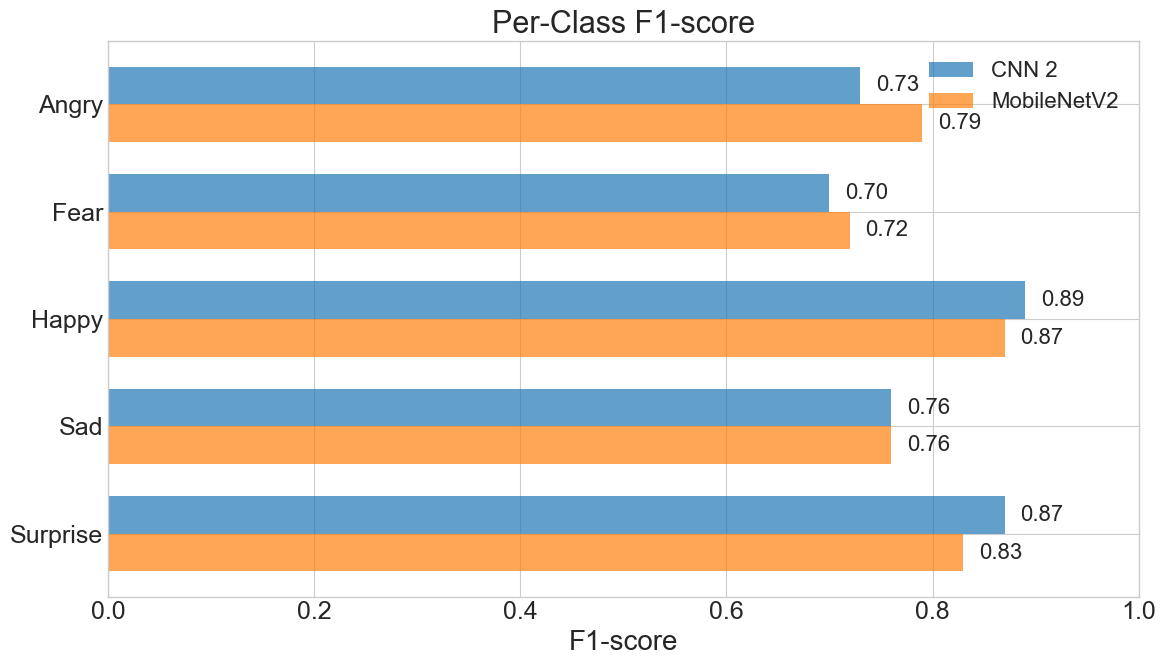

In [35]:
classes = ["Angry", "Fear", "Happy", "Sad", "Surprise"]
f1_cnn = [0.73, 0.70, 0.89, 0.76, 0.87]
f1_mobilenet = [0.79, 0.72, 0.87, 0.76, 0.83]

y = np.arange(len(classes))
height = 0.35

plt.style.use("seaborn-v0_8-whitegrid")

plt.rcParams['font.size'] = 18
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 16

colors = sns.color_palette("tab10", 2)
plt.figure(figsize=(12, 7))
plt.barh(y - height/2, f1_cnn, height, color=colors[0], alpha=0.7, label="CNN 2")
plt.barh(y + height/2, f1_mobilenet, height, color=colors[1], alpha=0.7, label="MobileNetV2")

for i, v in enumerate(f1_cnn):
    plt.text(v + 0.015, y[i] - height/2, f"{v:.2f}", va="center", fontsize=16)

for i, v in enumerate(f1_mobilenet):
    plt.text(v + 0.015, y[i] + height/2, f"{v:.2f}", va="center", fontsize=16)

# Axis + Title
plt.yticks(y, classes)
plt.xlabel("F1-score")
plt.xlim(0, 1)
plt.title("Per-Class F1-score")
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("per_class_f1.png")
plt.show()
